<a href="https://colab.research.google.com/github/JulieNguyen0403/H-M-Recommendation-System/blob/main/IS695_H%26M_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identified problems, business values, and the importance of the problems.



*  Background of the company:<br>
  H & M is a multinational clothing company that was founded in 1947. H&M currently has approximately 4,850 stores and 53 online marketplaces. The company's online stores offer a wide range of products for customers to look through.  However, too many options may make it difficult for customers to find what they are interested in or are looking for, which may prevent them from making a purchase. Because of these concerns, our team have identified the problem below and come up with a solution to help improve and solve these problems. 


*   Identified problem: <br> Problem is to predict what articles each customer will purchase in the 7-day period immediately after the training data ends.


*   Business values and importance of the problem:<br>
Enhancing the shopping experience <br>
Boost product recommendations <br>
Help customers make the right purchase choices → reduce returns → positive implications for sustainability






# Data Description

We were given the purchase history of customers across time. Below are the four data files we are going to use for this project: <br>

*   articles.csv: <br>
detailed metadata for each article_id purchased 
*   customers.csv: <br>
metadata for each customer_id in dataset <br>
*   transactions_train.csv:
the training data, consisting of the purchases each customer for each date, and additional information 
*   Images: <br>
a folder of images corresponding to each article_id, images are placed in subfolders,  starting with the first three digits of the article_id; not all article_id values have a corresponding image.


#Upload Data and Exploring Data

In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances
from scipy.sparse import csr_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn
import torch.optim as optim
from itertools import chain

import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from datetime import datetime
from PIL import Image

##Customer Data

In [3]:
# Read data (with assignment operator)
cus = pd.read_csv('/content/drive/MyDrive/IS 695/IS699_Project/customers.csv')

cus

customer_id   FN  Active  \
0        00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  NaN     NaN   
1        0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  NaN     NaN   
2        000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  NaN     NaN   
3        00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...  NaN     NaN   
4        00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  1.0     1.0   
...                                                    ...  ...     ...   
1371975  ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...  NaN     NaN   
1371976  ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...  NaN     NaN   
1371977  ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...  1.0     1.0   
1371978  ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...  1.0     1.0   
1371979  ffffd9ac14e89946416d80e791d064701994755c3ab686...  NaN     NaN   

        club_member_status fashion_news_frequency   age  \
0                   ACTIVE                   NONE  49.0   
1                   ACTIVE                   NONE  25.0   
2                   ACTIVE                   NONE  24.0   
3                   ACTIVE                   NONE  54.0   
4                   ACTIVE              Regularly  52.0   
...                    ...                    ...   ...   
1371975             ACTIVE                   NONE  24.0   
1371976             ACTIVE                   NONE  21.0   
1371977             ACTIVE              Regularly  21.0   
1371978             ACTIVE              Regularly  18.0   
1371979         PRE-CREATE                   NONE  65.0   

                                               postal_code  
0        52043ee2162cf5aa7ee79974281641c6f11a68d276429a...  
1        2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...  
2        64f17e6a330a85798e4998f62d0930d14db8db1c054af6...  
3        5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...  
4        25fa5ddee9aac01b35208d01736e57942317d756b32ddd...  
...                                                    ...  
1371975  7aa399f7e669990daba2d92c577b52237380662f36480b...  
1371976  3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...  
1371977  4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...  
1371978  8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...  
1371979  0a1a03306fb2f62164c2a439b38c0caa64b40deaae8687...  

[1371980 rows x 7 columns]

In [4]:
cus.shape

(1371980, 7)

In [5]:
cus.dtypes

customer_id                object
FN                        float64
Active                    float64
club_member_status         object
fashion_news_frequency     object
age                       float64
postal_code                object
dtype: object

In [6]:
#Checking null value
cus.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [7]:
#Change the value in fashion news frequency column
cus['fashion_news_frequency']=cus['fashion_news_frequency'].replace(['None'],'NONE')

###Exploring Data

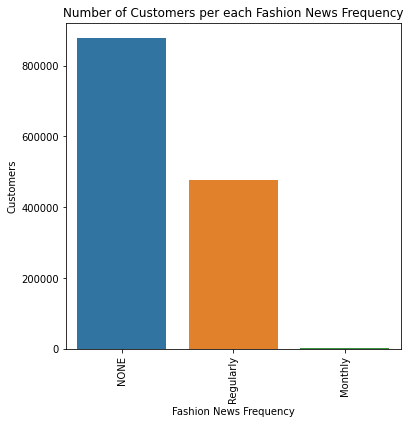

In [8]:
#Exploring about fashion news frequency column
temp = cus.groupby(["fashion_news_frequency"])["customer_id"].count()
df = pd.DataFrame({'Fashion News Frequency': temp.index,
                   'Customers': temp.values
                  })
df = df.sort_values(['Customers'], ascending=False)
plt.figure(figsize = (6,6))
plt.title(f'Number of Customers per each Fashion News Frequency')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Fashion News Frequency', y="Customers", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

Most customers don’t use Fashion News.<br>
Out of more than 1 million customer_id given, only about 450,000 customers are considered as regularly using Fashion News.<br>
Very few customers use Fashion News monthly. 


In [9]:
cus['fashion_news_frequency'].value_counts()

NONE         877713
Regularly    477416
Monthly         842
Name: fashion_news_frequency, dtype: int64

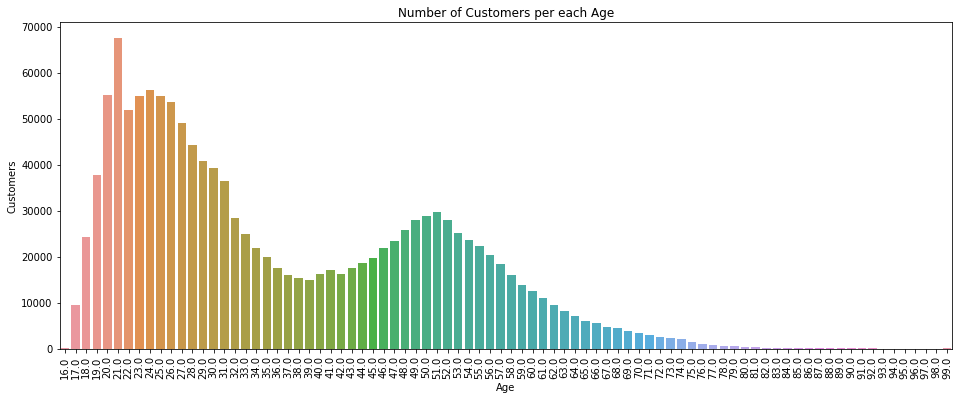

In [10]:
#Exploring age column
temp = cus.groupby(["age"])["customer_id"].count()
df = pd.DataFrame({'Age': temp.index,
                   'Customers': temp.values
                  })
df = df.sort_values(['Age'], ascending=False)
plt.figure(figsize = (16,6))
plt.title(f'Number of Customers per each Age')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Age', y="Customers", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

H & M has the majority of customers with the age range from 18 to 31 years old. 


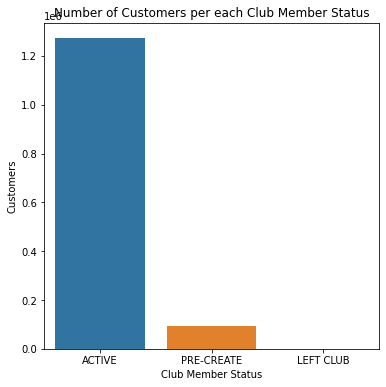

In [11]:
#Exploring the Club Member Status
temp = cus.groupby(["club_member_status"])["customer_id"].count()
df = pd.DataFrame({'Club Member Status': temp.index,
                   'Customers': temp.values
                  })
df = df.sort_values(['Customers'], ascending=False)
plt.figure(figsize = (6,6))
plt.title(f'Number of Customers per each Club Member Status')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Club Member Status', y="Customers", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=0)
locs, labels = plt.xticks()
plt.show()

Most customers are Active Member<br>

About more than 90,000 customers are pre-create member<br>

Very few customers left the club


In [12]:
cus['club_member_status'].value_counts()

ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64

##Article Data

In [13]:
# Read data (with assignment operator)
art = pd.read_csv('/content/drive/MyDrive/IS 695/IS699_Project/articles.csv')
art

article_id  product_code               prod_name  product_type_no  \
0        108775015        108775               Strap top              253   
1        108775044        108775               Strap top              253   
2        108775051        108775           Strap top (1)              253   
3        110065001        110065       OP T-shirt (Idro)              306   
4        110065002        110065       OP T-shirt (Idro)              306   
...            ...           ...                     ...              ...   
105537   953450001        953450  5pk regular Placement1              302   
105538   953763001        953763       SPORT Malaga tank              253   
105539   956217002        956217         Cartwheel dress              265   
105540   957375001        957375        CLAIRE HAIR CLAW               72   
105541   959461001        959461            Lounge dress              265   

       product_type_name  product_group_name  graphical_appearance_no  \
0               Vest top  Garment Upper body                  1010016   
1               Vest top  Garment Upper body                  1010016   
2               Vest top  Garment Upper body                  1010017   
3                    Bra           Underwear                  1010016   
4                    Bra           Underwear                  1010016   
...                  ...                 ...                      ...   
105537             Socks      Socks & Tights                  1010014   
105538          Vest top  Garment Upper body                  1010016   
105539             Dress   Garment Full body                  1010016   
105540         Hair clip         Accessories                  1010016   
105541             Dress   Garment Full body                  1010016   

       graphical_appearance_name  colour_group_code colour_group_name  ...  \
0                          Solid                  9             Black  ...   
1                          Solid                 10             White  ...   
2                         Stripe                 11         Off White  ...   
3                          Solid                  9             Black  ...   
4                          Solid                 10             White  ...   
...                          ...                ...               ...  ...   
105537           Placement print                  9             Black  ...   
105538                     Solid                  9             Black  ...   
105539                     Solid                  9             Black  ...   
105540                     Solid                  9             Black  ...   
105541                     Solid                 11         Off White  ...   

          department_name index_code        index_name index_group_no  \
0            Jersey Basic          A        Ladieswear              1   
1            Jersey Basic          A        Ladieswear              1   
2            Jersey Basic          A        Ladieswear              1   
3          Clean Lingerie          B  Lingeries/Tights              1   
4          Clean Lingerie          B  Lingeries/Tights              1   
...                   ...        ...               ...            ...   
105537          Socks Bin          F          Menswear              3   
105538             Jersey          A        Ladieswear              1   
105539             Jersey          A        Ladieswear              1   
105540  Small Accessories          D           Divided              2   
105541             Jersey          A        Ladieswear              1   

        index_group_name section_no            section_name garment_group_no  \
0             Ladieswear         16  Womens Everyday Basics             1002   
1             Ladieswear         16  Womens Everyday Basics             1002   
2             Ladieswear         16  Womens Everyday Basics             1002   
3             Ladieswear         61         Womens Lingerie             

In [14]:
#Drop unused columns
art=art.drop(columns=['product_code','product_type_no','graphical_appearance_no','colour_group_code','perceived_colour_value_id','perceived_colour_master_id','department_no','index_code','index_group_no','section_no','garment_group_no','detail_desc'],axis=1)
art

article_id               prod_name product_type_name  \
0        108775015               Strap top          Vest top   
1        108775044               Strap top          Vest top   
2        108775051           Strap top (1)          Vest top   
3        110065001       OP T-shirt (Idro)               Bra   
4        110065002       OP T-shirt (Idro)               Bra   
...            ...                     ...               ...   
105537   953450001  5pk regular Placement1             Socks   
105538   953763001       SPORT Malaga tank          Vest top   
105539   956217002         Cartwheel dress             Dress   
105540   957375001        CLAIRE HAIR CLAW         Hair clip   
105541   959461001            Lounge dress             Dress   

        product_group_name graphical_appearance_name colour_group_name  \
0       Garment Upper body                     Solid             Black   
1       Garment Upper body                     Solid             White   
2       Garment Upper body                    Stripe         Off White   
3                Underwear                     Solid             Black   
4                Underwear                     Solid             White   
...                    ...                       ...               ...   
105537      Socks & Tights           Placement print             Black   
105538  Garment Upper body                     Solid             Black   
105539   Garment Full body                     Solid             Black   
105540         Accessories                     Solid             Black   
105541   Garment Full body                     Solid         Off White   

       perceived_colour_value_name perceived_colour_master_name  \
0                             Dark                        Black   
1                            Light                        White   
2                      Dusty Light                        White   
3                             Dark                        Black   
4                            Light                        White   
...                            ...                          ...   
105537                        Dark                        Black   
105538                        Dark                        Black   
105539                        Dark                        Black   
105540                        Dark                        Black   
105541                 Dusty Light                        White   

          department_name        index_name index_group_name  \
0            Jersey Basic        Ladieswear       Ladieswear   
1            Jersey Basic        Ladieswear       Ladieswear   
2            Jersey Basic        Ladieswear       Ladieswear   
3          Clean Lingerie  Lingeries/Tights       Ladieswear   
4          Clean Lingerie  Lingeries/Tights       Ladieswear   
...                   ...               ...              ...   
105537          Socks Bin          Menswear         Menswear   
105538             Jersey        Ladieswear       Ladieswear   
105539             Jersey        Ladieswear       Ladieswear   
105540  Small Accessories           Divided          Divided   
105541             Jersey        Ladieswear       Ladieswear   

                  section_name garment_group_name  
0       Womens Everyday Basics       Jersey Basic  
1       Womens Everyday Basics       Jersey Basic  
2       Womens Everyday Basics       Jersey Basic  
3              Womens Lingerie  Under-, Nightwear  
4              Womens Lingerie  Under-, Nightwear  
...                        ...                ...  
105537           Men Underwear   Socks and Tights  
105538                    H&M+       Jersey Fancy  
105539            Womens Trend       Jersey Fancy  
105540     Divided Accessories        Accessories  
105541            Womens Trend       Jersey Fancy  

[105542 rows x 13 columns]

In [15]:
art.shape

(105542, 13)

In [16]:
art.dtypes

article_id                       int64
prod_name                       object
product_type_name               object
product_group_name              object
graphical_appearance_name       object
colour_group_name               object
perceived_colour_value_name     object
perceived_colour_master_name    object
department_name                 object
index_name                      object
index_group_name                object
section_name                    object
garment_group_name              object
dtype: object

In [17]:
art.isnull().sum()

article_id                      0
prod_name                       0
product_type_name               0
product_group_name              0
graphical_appearance_name       0
colour_group_name               0
perceived_colour_value_name     0
perceived_colour_master_name    0
department_name                 0
index_name                      0
index_group_name                0
section_name                    0
garment_group_name              0
dtype: int64

###Exploring Data

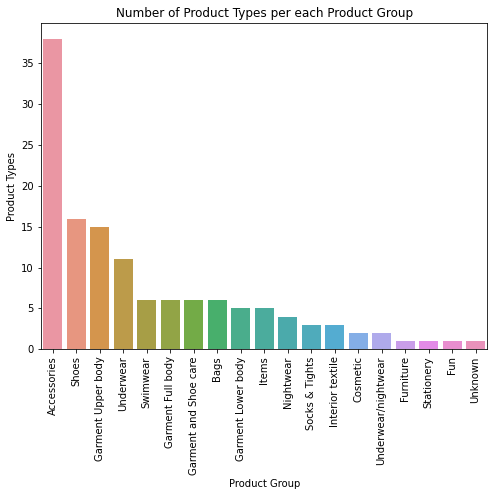

In [18]:
temp = art.groupby(["product_group_name"])["product_type_name"].nunique()
df = pd.DataFrame({'Product Group': temp.index,
                   'Product Types': temp.values
                  })
df = df.sort_values(['Product Types'], ascending=False)
plt.figure(figsize = (8,6))
plt.title('Number of Product Types per each Product Group')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Group', y="Product Types", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

From the "Number of Product Types per each Product Group" bar graph above, we can identify the top 3 product group that has product type: <br>
Accessories<br>
Shoes<br>
Garment Upper Body



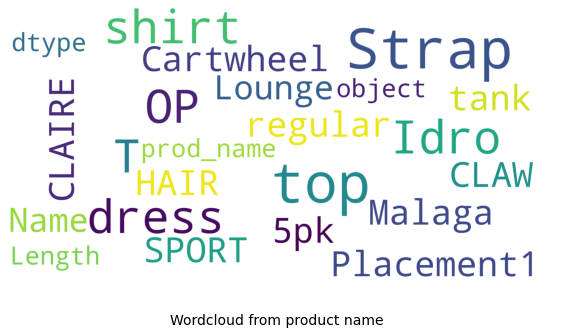

In [19]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=14)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(art["prod_name"], "Wordcloud from product name")

We used Word Cloud to create a data visualization like the image above. <br>The size of each word indicates its frequency or importance.<br> Some of the words have bigger size which mean they are also more popular include: Top, Strap, Shirt, Idro, etc.


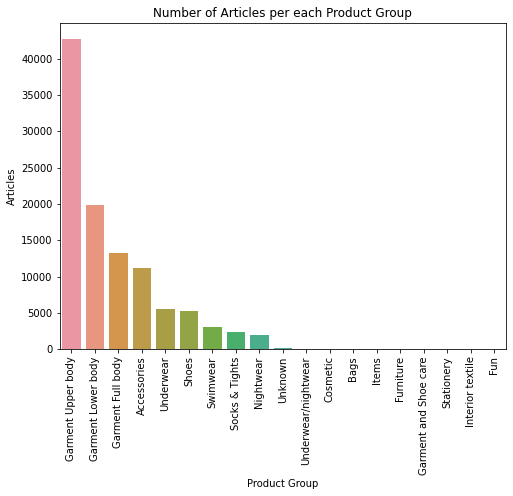

In [20]:
temp = art.groupby(["product_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Product Group': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (8,6))
plt.title('Number of Articles per each Product Group')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Group', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

From the graph above, we can see that Garment Upper Body  is the product group that include the most articles.


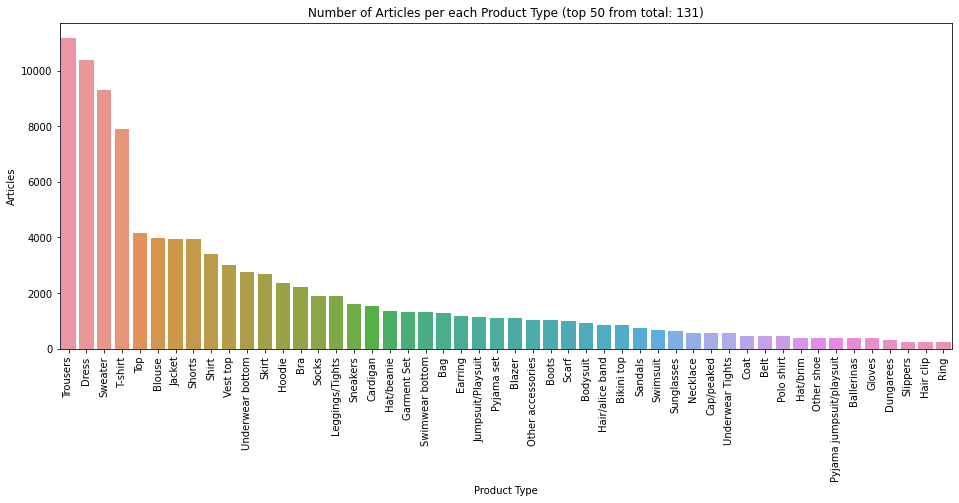

In [21]:
temp = art.groupby(["product_type_name"])["article_id"].nunique()
df = pd.DataFrame({'Product Type': temp.index,
                   'Articles': temp.values
                  })
total_types = len(df['Product Type'].unique())
df = df.sort_values(['Articles'], ascending=False)[0:50]
plt.figure(figsize = (16,6))
plt.title(f'Number of Articles per each Product Type (top 50 from total: {total_types})')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Type', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

Product types that have the most articles include: trousers, dress, sweater and top.<br>
Some accessories such as belt, hat, gloves, hair clip, ring,... have fewer number of articles. 


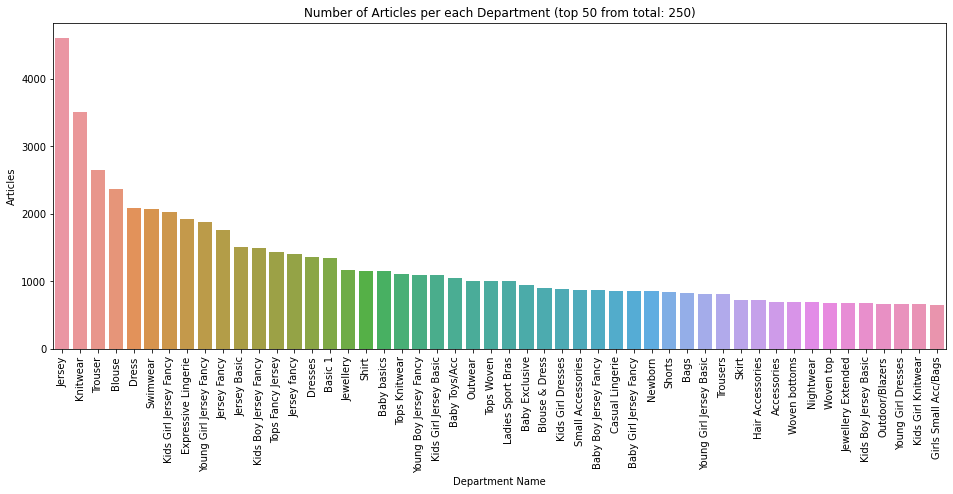

In [22]:
temp = art.groupby(["department_name"])["article_id"].nunique()
df = pd.DataFrame({'Department Name': temp.index,
                   'Articles': temp.values
                  })
total_depts = len(df['Department Name'].unique())
df = df.sort_values(['Articles'], ascending=False).head(50)
plt.figure(figsize = (16,6))
plt.title(f'Number of Articles per each Department (top 50 from total: {total_depts})')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Department Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

Group by garment_group_name column<br>
Jersey Fancy is the garment group that has the most number of articles. 


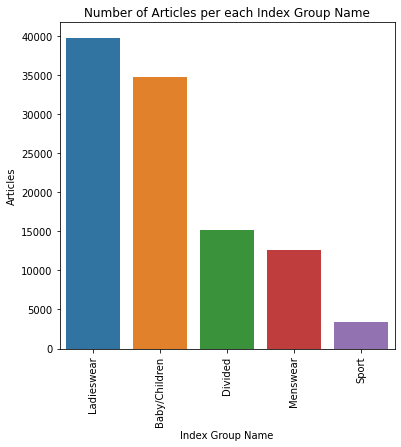

In [23]:
temp = art.groupby(["index_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Index Group Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (6,6))
plt.title(f'Number of Articles per each Index Group Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Index Group Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

Based on the bar graph above, we discover that:<br>
*   Ladieswear is the group that has highest number of articles
*   Sport is the group that has lowest number of articles





##Transaction Data

In [24]:
# Read data (with assignment operator)
transaction = pd.read_csv('/content/drive/MyDrive/IS 695/IS699_Project/transactions_train.csv')

transaction

t_dat                                        customer_id  \
0         2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
1         2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
2         2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   
3         2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   
4         2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   
...              ...                                                ...   
31788319  2020-09-22  fff2282977442e327b45d8c89afde25617d00124d0f999...   
31788320  2020-09-22  fff2282977442e327b45d8c89afde25617d00124d0f999...   
31788321  2020-09-22  fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...   
31788322  2020-09-22  fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...   
31788323  2020-09-22  fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...   

          article_id     price  sales_channel_id  
0          663713001  0.050831                 2  
1          541518023  0.030492                 2  
2          505221004  0.015237                 2  
3          685687003  0.016932                 2  
4          685687004  0.016932                 2  
...              ...       ...               ...  
31788319   929511001  0.059305                 2  
31788320   891322004  0.042356                 2  
31788321   918325001  0.043203                 1  
31788322   833459002  0.006763                 1  
31788323   898573003  0.033881                 2  

[31788324 rows x 5 columns]

In [25]:
transaction.shape

(31788324, 5)

In [26]:
transaction.dtypes

t_dat                object
customer_id          object
article_id            int64
price               float64
sales_channel_id      int64
dtype: object

In [27]:
transaction.isnull().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

###Exploring data

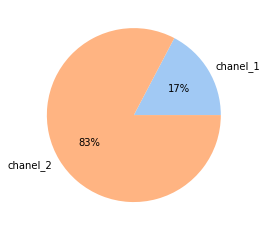

In [28]:
df = transaction.sample(100_000)
chanel_1= df.loc[df["sales_channel_id"]==1].sales_channel_id.sum()
chanel_2= df.loc[df["sales_channel_id"]==2].sales_channel_id.sum()

data=[chanel_1,chanel_2]
labels=['chanel_1','chanel_2']

colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

From the pie cart above, we can see that majority of sales is from chanel 2 (82%). <br>
Chanel_1: wholesale, B2B<br>
Chanel_2: retail



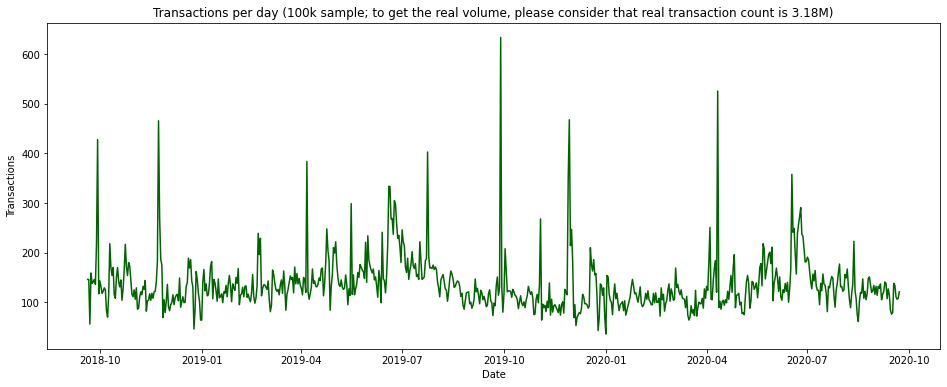

In [29]:
df = transaction.sample(100_000).groupby(["t_dat"])["article_id"].count().reset_index()
df["t_dat"] = df["t_dat"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df.columns = ["Date", "Transactions"]
fig, ax = plt.subplots(1, 1, figsize=(16,6))
plt.plot(df["Date"], df["Transactions"], color="Darkgreen")
plt.xlabel("Date")
plt.ylabel("Transactions")
plt.title(f"Transactions per day (100k sample; to get the real volume, please consider that real transaction count is {round(transaction.shape[0]/10.e6,2)}M)")
plt.show()

We can see the increase in sales in October, December and April-May (Holidays promotion).


article_id                 prod_name product_type_name  \
53892   706016001  Jade HW Skinny Denim TRS          Trousers   

       product_group_name graphical_appearance_name colour_group_name  \
53892  Garment Lower body                     Solid             Black   

      perceived_colour_value_name perceived_colour_master_name  \
53892                        Dark                        Black   

      department_name index_name index_group_name        section_name  \
53892        Trousers    Divided          Divided  Divided Collection   

      garment_group_name  
53892           Trousers

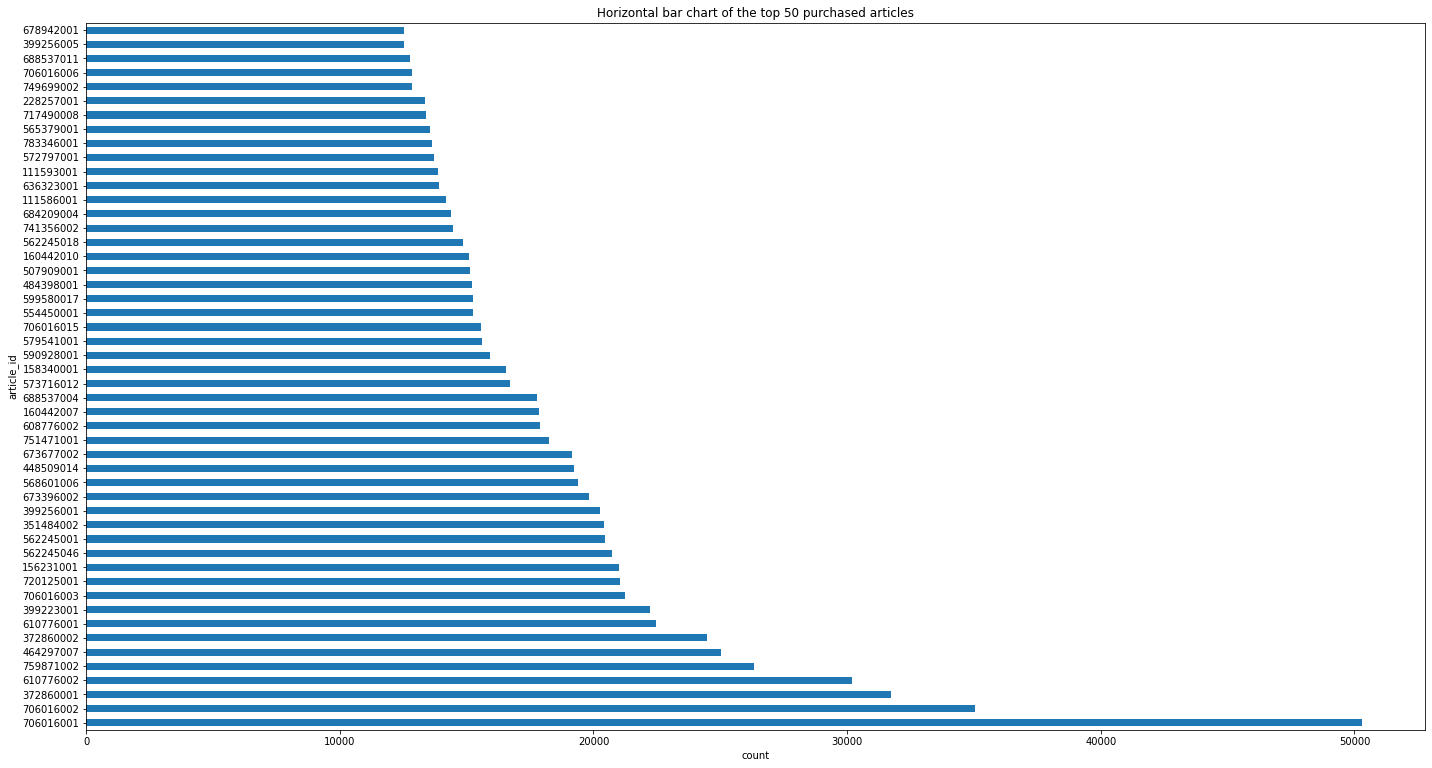

In [30]:
# Top 50 articles that were purchased the most
plt.figure(figsize = (24,13))
transaction['article_id'].value_counts()[:50].plot(kind='barh')
plt.title('Horizontal bar chart of the top 50 purchased articles')
plt.xlabel('count')
plt.ylabel('article_id')

#Display details of the top article that were purchased the most
art.loc[art['article_id'] == 706016001]

The bar chart above shows the 50 articles that were purchased the most. Using th article id, we figure out that the product was purchased the most is Jade HW Skinny Denim TRS which belong to the Trousers department. 

 




##Image Data

In [31]:
import cv2, matplotlib.pyplot as plt
from os.path import exists

In [32]:
#number of each article_id in the transaction table
vc = transaction['article_id'].value_counts()
pairs = {}
for j,i in enumerate(vc.index.values[1000:1032]):#for any article that has 1000-1032 items
    #if j%10==0: print(j,', ',end='')
    #identify the customers that bought the article
    USERS = transaction.loc[transaction.article_id==i.item(),'customer_id'].unique()
    #Identify the articles that those customers above also bought
    vc2 = transaction.loc[(transaction.customer_id.isin(USERS))&(transaction.article_id!=i.item()),'article_id'].value_counts()
    #print the top three items that they also bought with the article
    pairs[i.item()] = [vc2.index[0], vc2.index[1], vc2.index[2]]


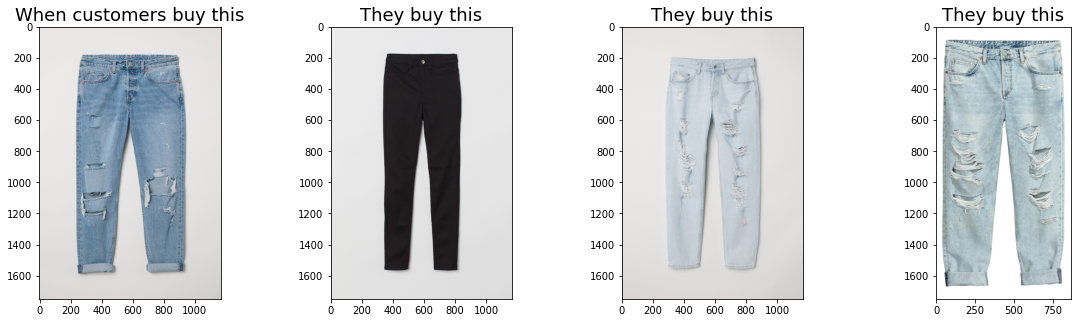

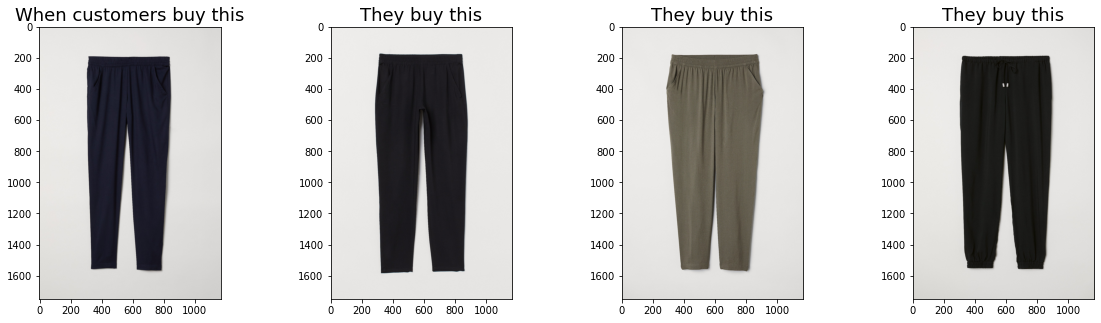

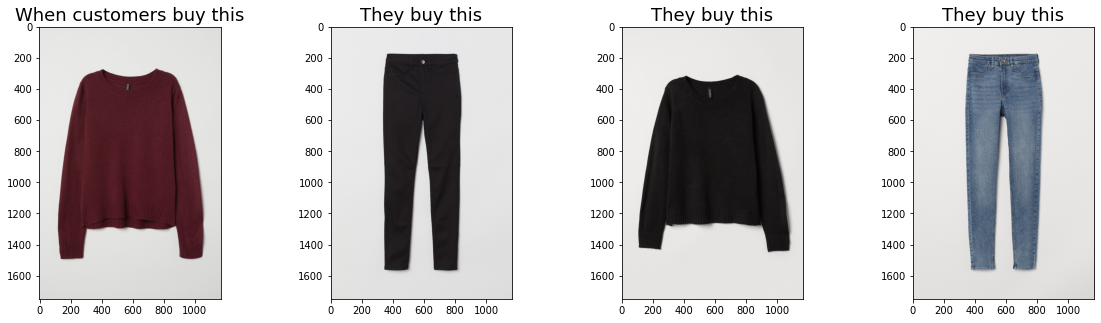

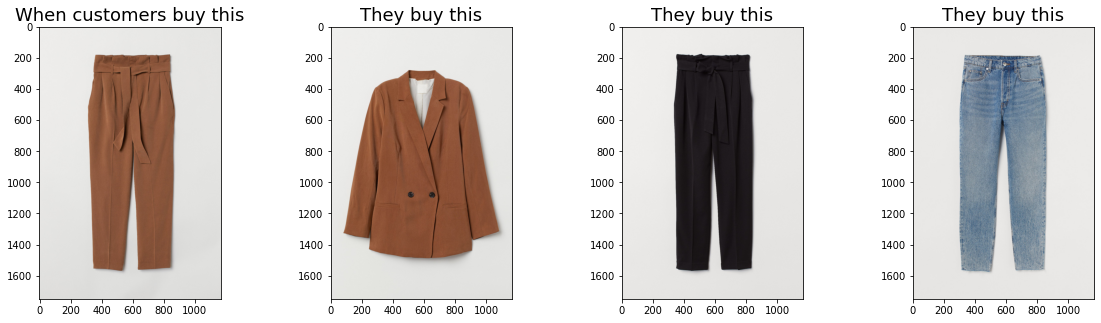

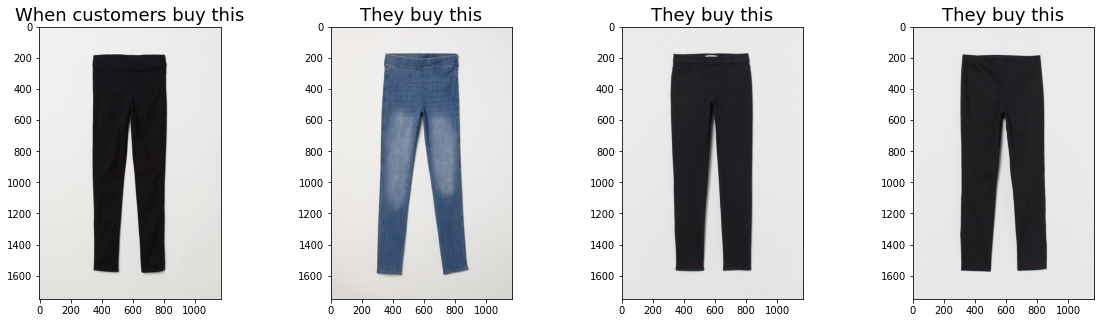

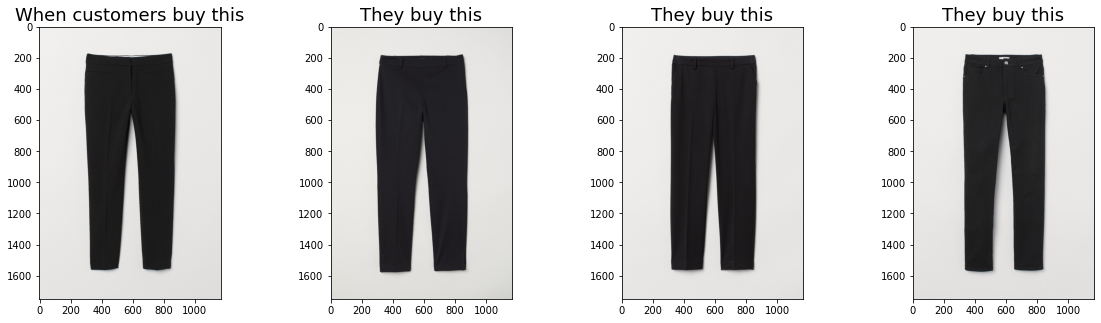

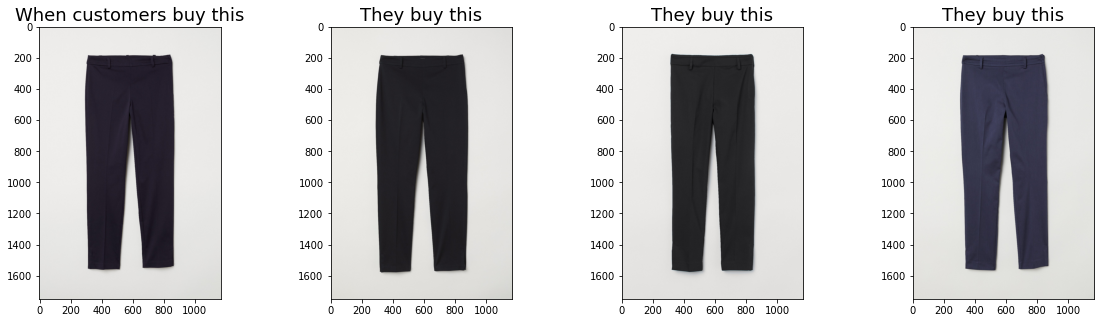

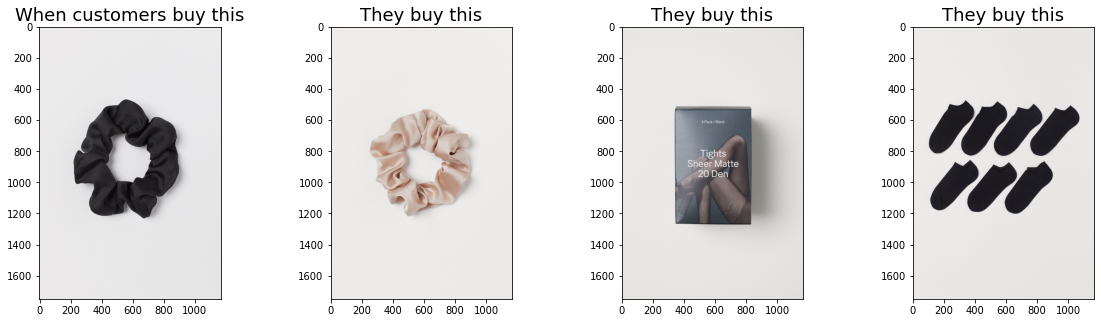

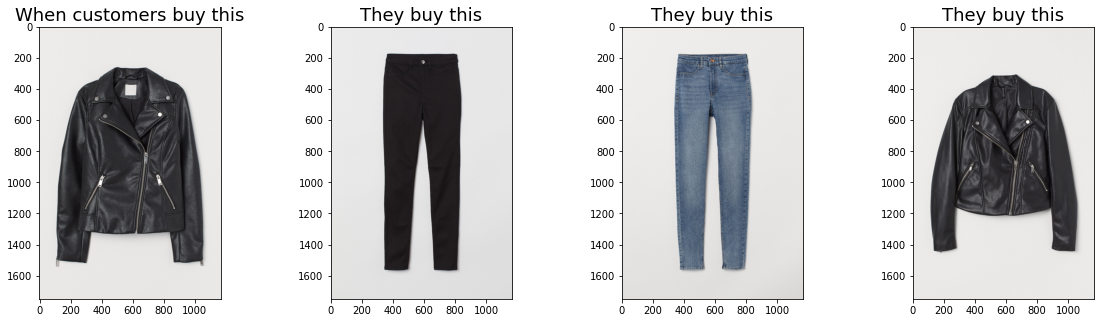

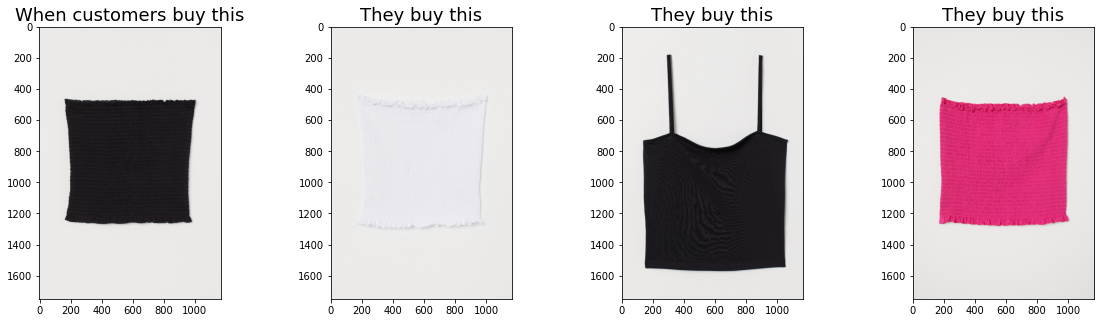

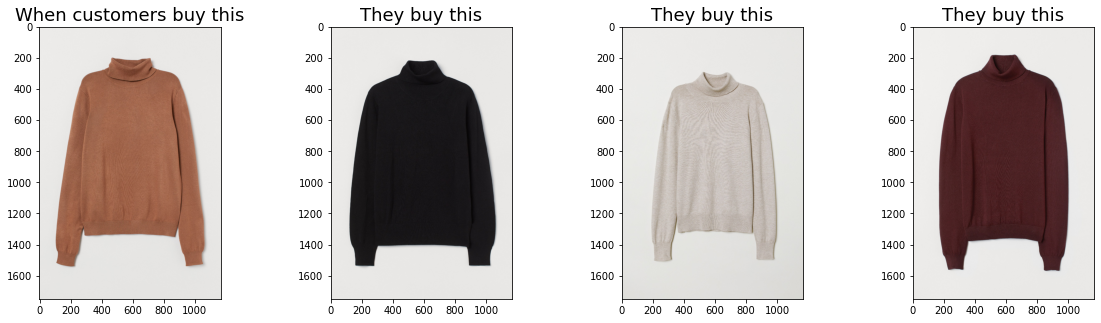

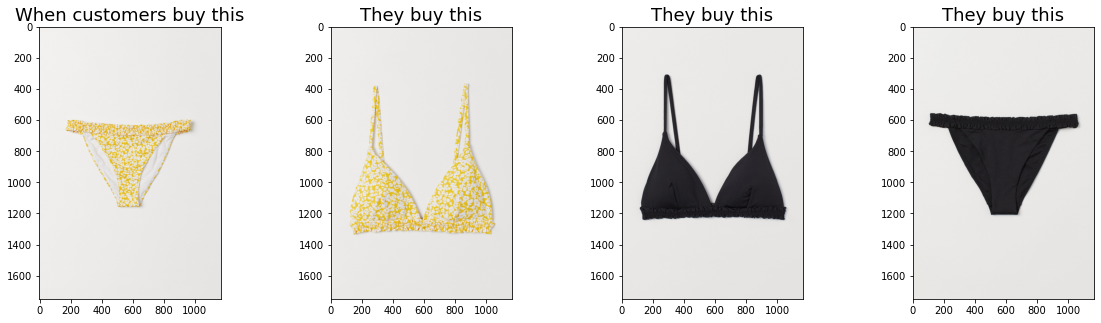

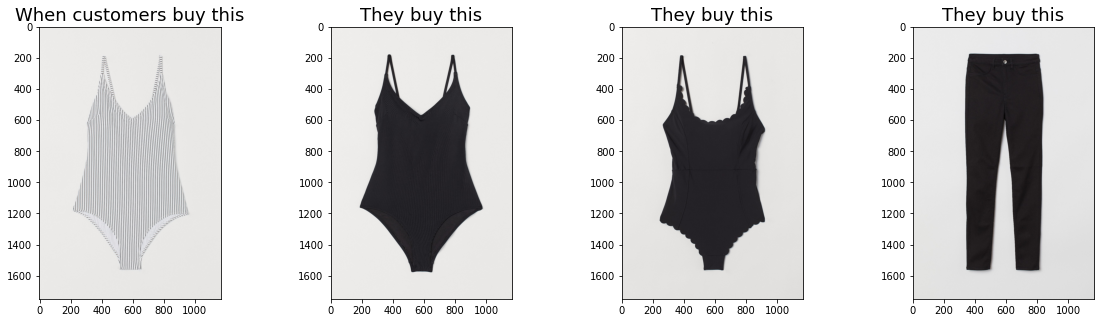

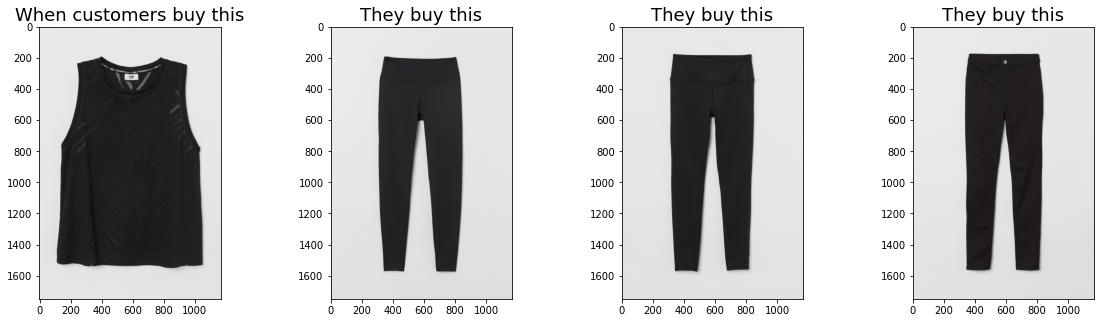

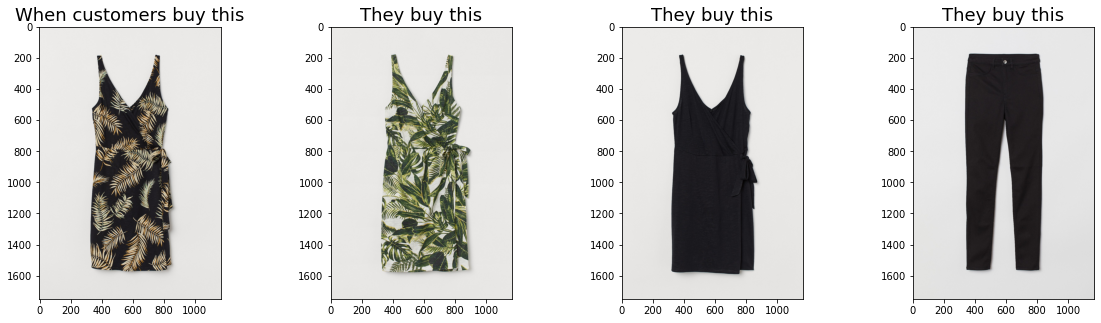

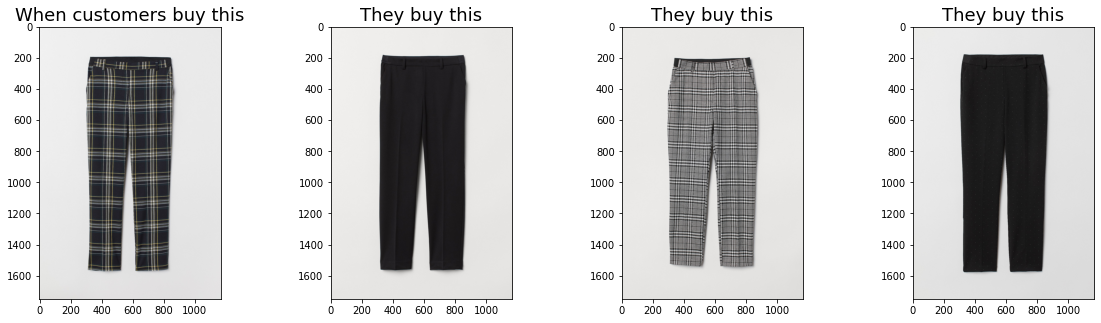

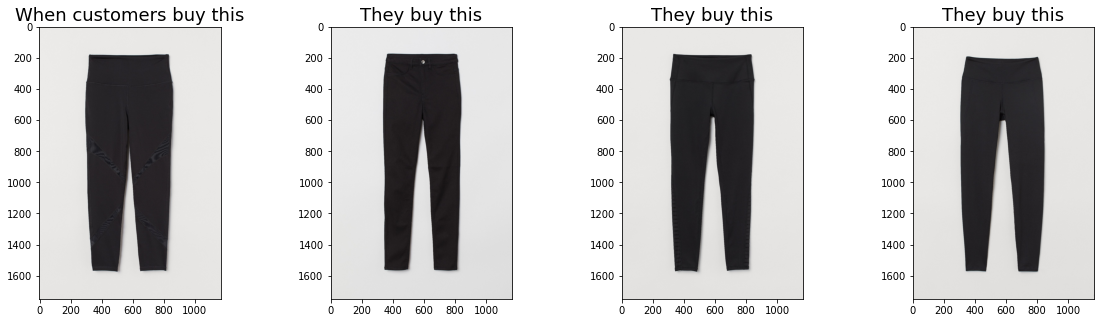

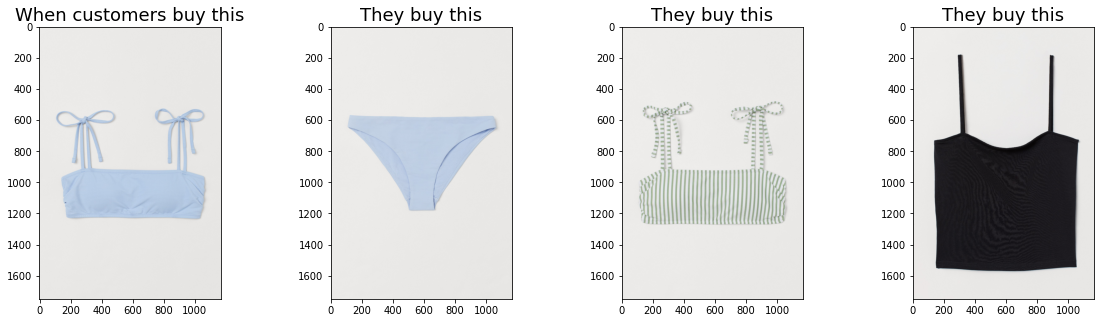

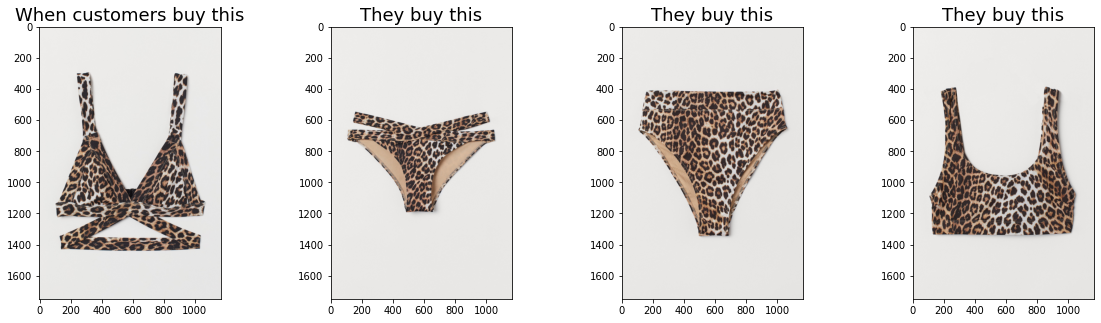

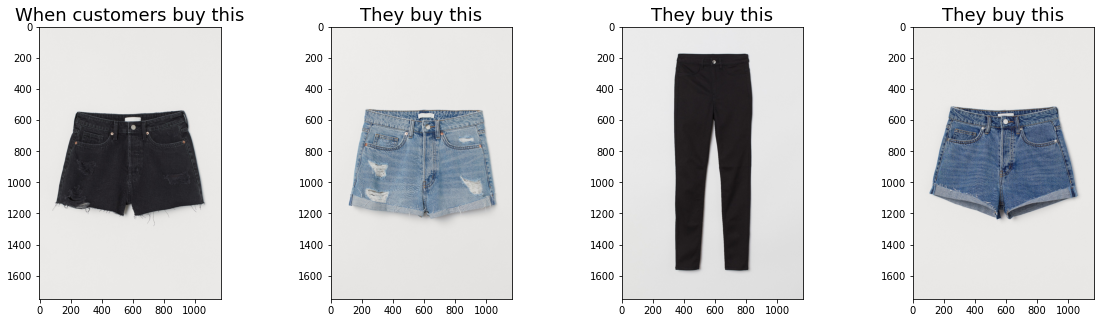

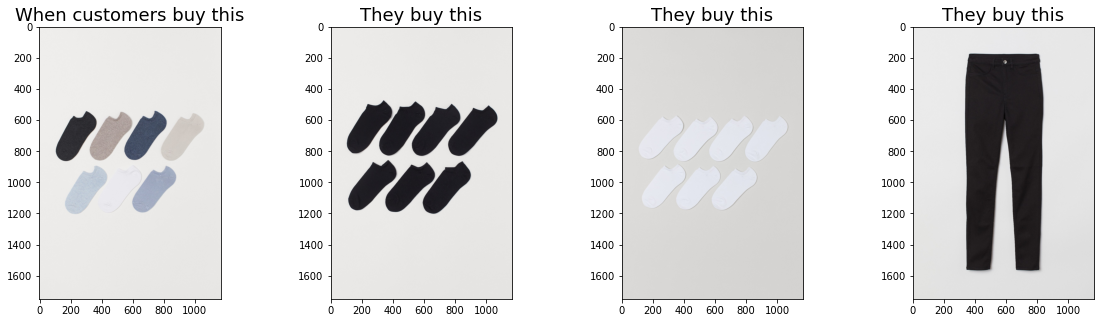

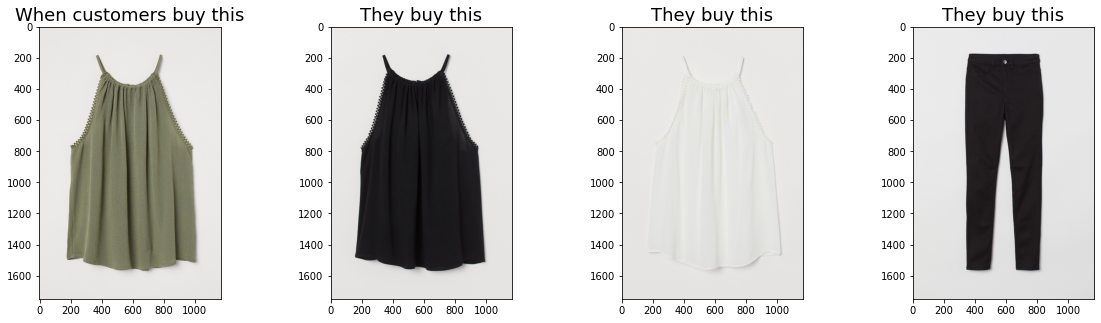

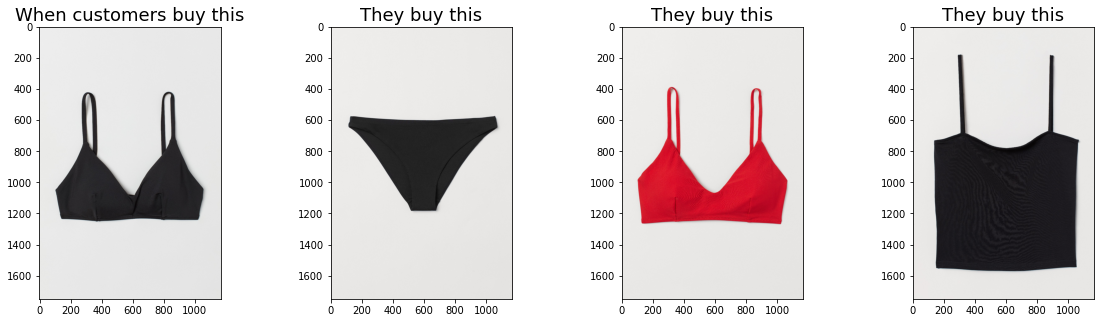

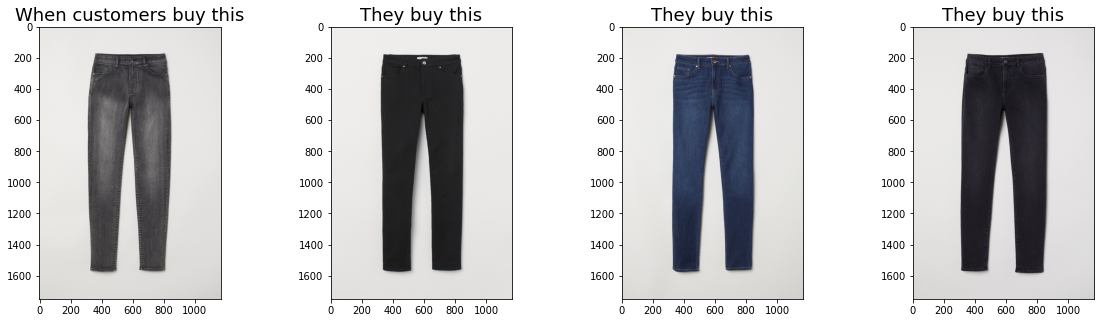

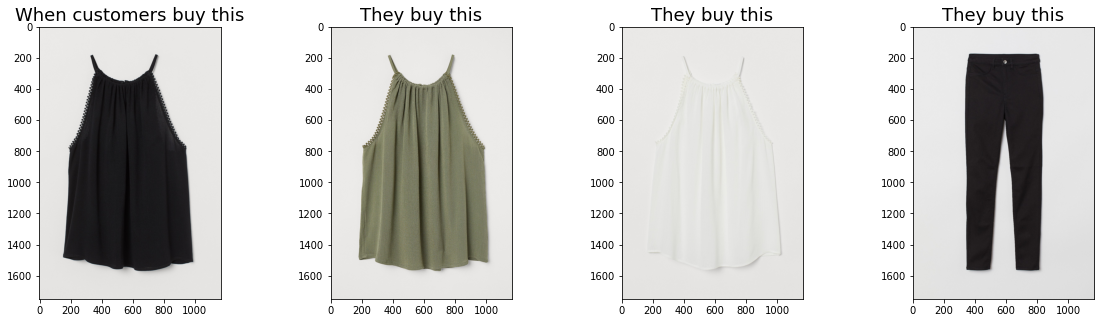

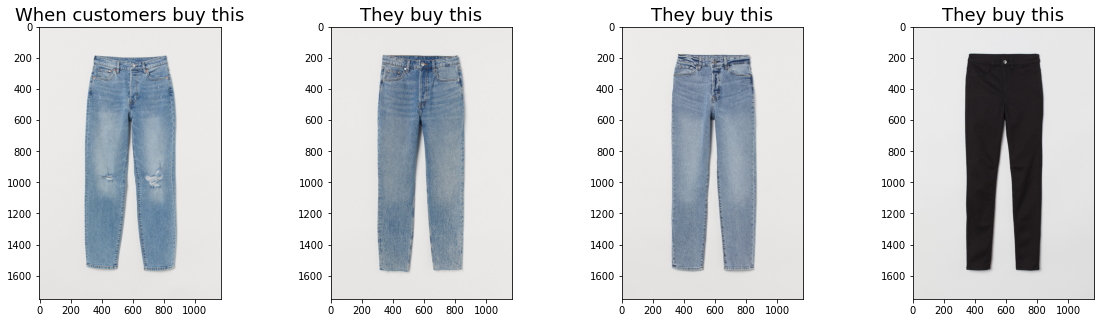

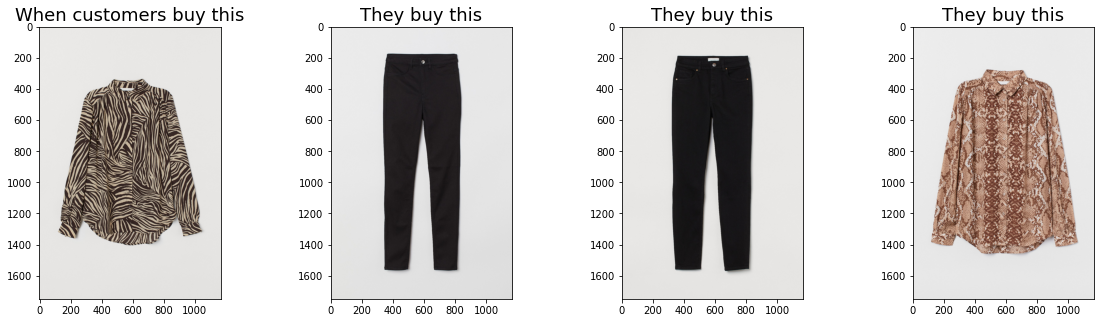

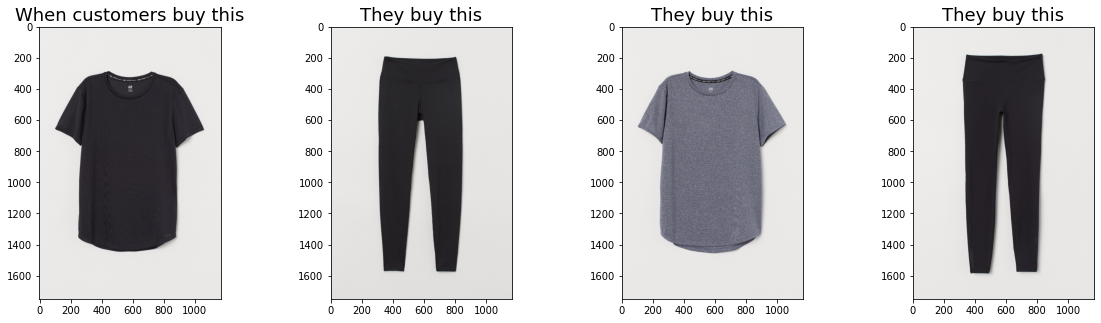

In [33]:
items=pd.read_csv('/content/drive/MyDrive/IS 695/IS699_Project/articles.csv')
BASE = '/content/drive/MyDrive/IS 695/IS699_Project/images/'

for i,(k,v) in enumerate(pairs.items()):
    name1 = BASE+'0'+str(k)[:2]+'/0'+str(k)+'.jpg'
    name2 = BASE+'0'+str(v[0])[:2]+'/0'+str(v[0])+'.jpg'
    name3 = BASE+'0'+str(v[1])[:2]+'/0'+str(v[1])+'.jpg'
    name4 = BASE+'0'+str(v[2])[:2]+'/0'+str(v[2])+'.jpg'
    if exists(name1) & exists(name2) & exists(name3) & exists(name4):
        plt.figure(figsize=(20,5))
        img1 = cv2.imread(name1)[:,:,::-1]
        img2 = cv2.imread(name2)[:,:,::-1]
        img3 = cv2.imread(name3)[:,:,::-1]
        img4 = cv2.imread(name4)[:,:,::-1]
        plt.subplot(1,4,1)
        plt.title('When customers buy this',size=18)
        plt.imshow(img1)
        plt.subplot(1,4,2)
        plt.title('They buy this',size=18)
        plt.imshow(img2)
        plt.subplot(1,4,3)
        plt.title('They buy this',size=18)
        plt.imshow(img3)
        plt.subplot(1,4,4)
        plt.title('They buy this',size=18)
        plt.imshow(img4)
        plt.show()

This is the popular articles that are purchased (articles that were purchased from 1000-1032 times). We find the customers who bought these popular articles and find out what other articles that they also bought. Here is the top three articles that these customers also bought.

#Neural Collaborative Filtering

##Scale Down the Dataset

In [34]:
#Check number of total purchase
total_purc=transaction.groupby('customer_id').count()
total_purc

t_dat  article_id  price  \
customer_id                                                                    
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d...     21          21     21   
0000423b00ade91418cceaf3b26c6af3dd342b51fd051ee...     86          86     86   
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad...     18          18     18   
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c...      2           2      2   
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe...     13          13     13   
...                                                   ...         ...    ...   
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747...     51          51     51   
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53...     84          84     84   
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a17...     45          45     45   
ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38b...      7           7      7   
ffffd9ac14e89946416d80e791d064701994755c3ab686a...      1           1      1   

                                                    sales_channel_id  
customer_id                                                           
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d...                21  
0000423b00ade91418cceaf3b26c6af3dd342b51fd051ee...                86  
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad...                18  
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c...                 2  
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe...                13  
...                                                              ...  
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747...                51  
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53...                84  
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a17...                45  
ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38b...                 7  
ffffd9ac14e89946416d80e791d064701994755c3ab686a...                 1  

[1362281 rows x 4 columns]

In [35]:
#Combine the total purchase table with the transaction table
trans=pd.merge(transaction,total_purc,on='customer_id', how='inner')
trans

t_dat_x                                        customer_id  \
0         2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
1         2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
2         2018-09-24  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
3         2019-03-01  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
4         2020-02-03  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
...              ...                                                ...   
31788319  2020-09-22  fee56cc5315dafb35a4490ccc6f711092cae913550c832...   
31788320  2020-09-22  fee56cc5315dafb35a4490ccc6f711092cae913550c832...   
31788321  2020-09-22  ff5b8a8b26bf93a66290e9bd1b73393ac6a58968a78519...   
31788322  2020-09-22  ff5b8a8b26bf93a66290e9bd1b73393ac6a58968a78519...   
31788323  2020-09-22  ff5b8a8b26bf93a66290e9bd1b73393ac6a58968a78519...   

          article_id_x   price_x  sales_channel_id_x  t_dat_y  article_id_y  \
0            663713001  0.050831                   2       18            18   
1            541518023  0.030492                   2       18            18   
2            663713001  0.050831                   2       18            18   
3            578020002  0.013542                   2       18            18   
4            723529001  0.025407                   2       18            18   
...                ...       ...                 ...      ...           ...   
31788319     903647001  0.050831                   2        2             2   
31788320     903647001  0.050831                   2        2             2   
31788321     913597001  0.042356                   2        3             3   
31788322     903420001  0.033881                   2        3             3   
31788323     761406001  0.025407                   2        3             3   

          price_y  sales_channel_id_y  
0              18                  18  
1              18                  18  
2              18                  18  
3              18                  18  
4              18                  18  
...           ...                 ...  
31788319        2                   2  
31788320        2                   2  
31788321        3                   3  
31788322        3                   3  
31788323        3                   3  

[31788324 rows x 9 columns]

In [36]:
#Drop the unused table and sort the customers by the total purchase
trans=trans.drop(columns=['price_x','sales_channel_id_x','t_dat_y','price_y','sales_channel_id_y'],axis=1)
trans=trans.rename(columns = {'article_id_y':'Total_Purchase'})

In [37]:
transac=trans.sort_values(by='Total_Purchase',ascending=False)
transac['t_dat_x']= transac['t_dat_x'].astype('datetime64[ns]')
transac

t_dat_x                                        customer_id  \
1673864  2019-06-11  be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...   
1675137  2020-09-03  be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...   
1675121  2020-08-29  be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...   
1675122  2020-08-29  be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...   
1675123  2020-08-29  be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...   
...             ...                                                ...   
30471263 2020-01-30  3ee34051b58863c04ed92426c7c9b7b9d8ec7773c1f194...   
30035547 2019-11-29  ef4662d4fa9f406497c69d47532e7deaf69f372cb1e7a2...   
31206292 2020-05-15  2ae44e13cdcd42c77f7d6c7984581123236256ac4529df...   
29345225 2019-09-15  2ea59d1ddf3ecee3c394868c72974a0972a3a6ee61b8a1...   
28981240 2019-08-06  9c278911119e9bc28676f9c06d81b45947d940392d3b12...   

          article_id_x  Total_Purchase  
1673864      562245064            1895  
1675137      898692003            1895  
1675121      898703001            1895  
1675122      833781002            1895  
1675123      863646001            1895  
...                ...             ...  
30471263     794007001               1  
30035547     748355002               1  
31206292     836327001               1  
29345225     688537017               1  
28981240     738368004               1  

[31788324 rows x 4 columns]

In [38]:
#Part_trans will be the data we are looking on as it conists all the customers made >=330 transactions
part_trans= transac.loc[transac['Total_Purchase'] >= 300]
part_trans

t_dat_x                                        customer_id  \
1673864  2019-06-11  be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...   
1675137  2020-09-03  be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...   
1675121  2020-08-29  be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...   
1675122  2020-08-29  be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...   
1675123  2020-08-29  be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...   
...             ...                                                ...   
15110374 2020-05-29  5b39bd74e88202223df4bc09768859e1752146e3fef699...   
15110375 2020-05-29  5b39bd74e88202223df4bc09768859e1752146e3fef699...   
15110376 2020-05-29  5b39bd74e88202223df4bc09768859e1752146e3fef699...   
15110377 2020-05-29  5b39bd74e88202223df4bc09768859e1752146e3fef699...   
15110378 2020-06-20  5b39bd74e88202223df4bc09768859e1752146e3fef699...   

          article_id_x  Total_Purchase  
1673864      562245064            1895  
1675137      898692003            1895  
1675121      898703001            1895  
1675122      833781002            1895  
1675123      863646001            1895  
...                ...             ...  
15110374     863001001             300  
15110375     768759006             300  
15110376     817416001             300  
15110377     840360003             300  
15110378     717490064             300  

[1336909 rows x 4 columns]

In [39]:
#Number of customer we will be working on
part_trans['customer_id'].nunique()

3292

In [40]:
#Number of article we will be working on
part_trans['article_id_x'].nunique()

74972

##Data Preprocessing

In [41]:
#Postivie Sampling (All the transactions is labeled as 1)
part_trans=part_trans.drop(columns=['Total_Purchase'], axis=1)
part_trans=part_trans.rename(columns={"article_id_x": "article_id"})
part_trans['Purchased']=1


In [42]:
#Encoding customer_id and article_id
label_encoder = preprocessing.LabelEncoder()
part_trans['customer_id'] = label_encoder.fit_transform(part_trans['customer_id'])
part_trans['article_id'] = label_encoder.fit_transform(part_trans['article_id'])
part_trans

t_dat_x  customer_id  article_id  Purchased
1673864  2019-06-11         2468        8227          1
1675137  2020-09-03         2468       72624          1
1675121  2020-08-29         2468       72631          1
1675122  2020-08-29         2468       63133          1
1675123  2020-08-29         2468       67835          1
...             ...          ...         ...        ...
15110374 2020-05-29         1177       67713          1
15110375 2020-05-29         1177       50861          1
15110376 2020-05-29         1177       60339          1
15110377 2020-05-29         1177       64097          1
15110378 2020-06-20         1177       38855          1

[1336909 rows x 4 columns]

In [43]:
# Sort data based on 'customer_id' and 'date'
part_transaction = part_trans.sort_values(by=['customer_id', 't_dat_x'])
part_transaction

t_dat_x  customer_id  article_id  Purchased
7991066  2018-10-01            0        8395          1
7991065  2018-10-01            0       28860          1
7991070  2018-10-01            0       25943          1
7991069  2018-10-01            0       28089          1
7991068  2018-10-01            0        5682          1
...             ...          ...         ...        ...
12739662 2020-09-21         3291       74178          1
12739663 2020-09-21         3291       74178          1
12739665 2020-09-21         3291       53266          1
12739666 2020-09-21         3291       27099          1
12739667 2020-09-21         3291       27099          1

[1336909 rows x 4 columns]

In [44]:
# Partition the data
test_data = part_transaction.drop_duplicates(subset=["customer_id"], keep='last') #Drop all the data record for each users and keep the last record for training data
index_df = part_transaction.index.isin(test_data.index)
train_data = part_transaction.iloc[~index_df]
print(len(train_data), len(test_data))

1333617 3292


In [45]:
# Remove the date column
train_data = train_data[['customer_id', 'article_id', 'Purchased']]
test_data = test_data[['customer_id', 'article_id', 'Purchased']]
print(train_data.shape, test_data.shape)

(1333617, 3) (3292, 3)


In [46]:
train_data

customer_id  article_id  Purchased
7991066             0        8395          1
7991065             0       28860          1
7991070             0       25943          1
7991069             0       28089          1
7991068             0        5682          1
...               ...         ...        ...
12739661         3291       69464          1
12739662         3291       74178          1
12739663         3291       74178          1
12739665         3291       53266          1
12739666         3291       27099          1

[1333617 rows x 3 columns]

In [47]:
test_data

customer_id  article_id  Purchased
7991737             0       42384          1
997609              1       69154          1
998561              2       73561          1
2950696             3       73353          1
15002186            4       30104          1
...               ...         ...        ...
9132600          3287       54672          1
1898427          3288       34817          1
996694           3289       73080          1
11462021         3290       74690          1
12739667         3291       27099          1

[3292 rows x 3 columns]

###Negative Sampling

In [48]:
train_working=train_data
train_working

customer_id  article_id  Purchased
7991066             0        8395          1
7991065             0       28860          1
7991070             0       25943          1
7991069             0       28089          1
7991068             0        5682          1
...               ...         ...        ...
12739661         3291       69464          1
12739662         3291       74178          1
12739663         3291       74178          1
12739665         3291       53266          1
12739666         3291       27099          1

[1333617 rows x 3 columns]

In [49]:
article_id_1=train_working['article_id'].values.tolist()
article_id_1=set(article_id_1)
article_id_1=list(article_id_1)
len(article_id_1)

74870

In [50]:
customer_id_1=train_working['customer_id'].values.tolist()
customer_id_1=set(customer_id_1)
customer_id_1=list(customer_id_1)
customer_id_1.sort()
len(customer_id_1)


3292

In [51]:
#Dictionary of the negative sampling
random.seed(10)
def func(x):
  dict={}
  for i in range(len(x)):
      if (x[i]) not in dict:
          dict[x[i]]=random.sample(article_id_1,50)
  return dict
neg_samp=(func(customer_id_1))
neg_samp

{0: [4271,
  56235,
  63272,
  1945,
  27021,
  60653,
  64418,
  36386,
  21007,
  4510,
  68279,
  64259,
  42973,
  9975,
  32777,
  47350,
  5842,
  55121,
  18184,
  46554,
  50033,
  55234,
  37185,
  34393,
  59899,
  22901,
  39739,
  47538,
  17435,
  59912,
  31386,
  57646,
  49199,
  5803,
  531,
  30897,
  17566,
  25560,
  39707,
  70350,
  48004,
  31491,
  41215,
  72014,
  59086,
  57171,
  61622,
  8520,
  42568,
  65810],
 1: [20508,
  29409,
  54133,
  31254,
  4840,
  4162,
  65113,
  39485,
  9443,
  69974,
  10612,
  19625,
  50402,
  74437,
  49058,
  19622,
  14804,
  12666,
  57895,
  21812,
  25033,
  45715,
  56804,
  54292,
  58428,
  32185,
  36016,
  18816,
  68436,
  23399,
  15664,
  35010,
  59756,
  39669,
  21624,
  22853,
  23088,
  62954,
  45569,
  43011,
  56998,
  29326,
  657,
  71470,
  5726,
  43482,
  41878,
  31811,
  10477,
  34321],
 2: [58749,
  53074,
  20745,
  51212,
  65003,
  31651,
  68898,
  35622,
  68203,
  63276,
  65543,
  822

In [52]:
#Generate postive sampling dictionary
pos_samp = {}
for index, values in train_working.iterrows():
    customer_id = values.customer_id
    if customer_id not in pos_samp:
        pos_samp[customer_id] = [(values.article_id)]
    else:
        pos_samp[customer_id].append((values.article_id))

In [53]:
#Check if there is any neg sampling in the pos_samp
for keyS in neg_samp:
  intersec=list(set(neg_samp[keyS]) & set(pos_samp[keyS]))
  for i in neg_samp[keyS]:
    if i not in intersec:
      neg_samp[keyS].remove(i)
len(neg_samp)

3292

In [54]:
df = pd.DataFrame.from_dict(neg_samp, orient = 'index')

neg_samp = df.stack().reset_index(level=1, drop=True).to_frame(name='article_id')
neg_samp.reset_index(inplace=True)
neg_samp=neg_samp.rename(columns={'index':'customer_id'})
neg_samp

customer_id  article_id
0                0     56235.0
1                0      1945.0
2                0     60653.0
3                0     36386.0
4                0      4510.0
...            ...         ...
82314         3291     55341.0
82315         3291     11801.0
82316         3291     36464.0
82317         3291     73784.0
82318         3291     52262.0

[82319 rows x 2 columns]

In [55]:
#Change the type of article_id to int
neg_samp['article_id']=neg_samp['article_id'].astype(int)
neg_samp

customer_id  article_id
0                0       56235
1                0        1945
2                0       60653
3                0       36386
4                0        4510
...            ...         ...
82314         3291       55341
82315         3291       11801
82316         3291       36464
82317         3291       73784
82318         3291       52262

[82319 rows x 2 columns]

In [56]:
#Add the column with assigning 0 as negative sampling
neg_samp['Purchased']=0
neg_samp

customer_id  article_id  Purchased
0                0       56235          0
1                0        1945          0
2                0       60653          0
3                0       36386          0
4                0        4510          0
...            ...         ...        ...
82314         3291       55341          0
82315         3291       11801          0
82316         3291       36464          0
82317         3291       73784          0
82318         3291       52262          0

[82319 rows x 3 columns]

In [57]:
train_data= pd.concat([train_data, neg_samp], ignore_index=True)
train_data

customer_id  article_id  Purchased
0                  0        8395          1
1                  0       28860          1
2                  0       25943          1
3                  0       28089          1
4                  0        5682          1
...              ...         ...        ...
1415931         3291       55341          0
1415932         3291       11801          0
1415933         3291       36464          0
1415934         3291       73784          0
1415935         3291       52262          0

[1415936 rows x 3 columns]

In [58]:
print(train_data.shape, test_data.shape)

(1415936, 3) (3292, 3)


##Build a Model

In [59]:
art_num = len(part_transaction['article_id'].unique())
art_num

74972

In [60]:
cust_num = len(part_transaction['customer_id'].unique())
cust_num

3292

In [61]:
# Build a neural network on training data 
class neural_network(nn.Module):
    def __init__(self,  emb_size, hidden_size1, hidden_size2, hidden_size3, hidden_size4, out_size): #the output has to be 1 since we want to have 1 number
        super().__init__()

        self.user_emb = nn.Embedding(cust_num, emb_size)
        self.item_emb = nn.Embedding(art_num, emb_size) #the length of the matrix
        
        self.network = nn.Sequential(
          nn.Linear(emb_size*2, hidden_size1), #For HW we need to change the emb_size*2
          nn.ReLU(),
          nn.Linear(hidden_size1, hidden_size2),
          nn.ReLU(),
          nn.Linear(hidden_size2, hidden_size3),
          nn.ReLU(),
          nn.Linear(hidden_size3, hidden_size4),
          nn.ReLU(),
          nn.Linear(hidden_size4, out_size))

    def forward(self, u_id, v_id): #For HW we need more input (to include the attributes)
        u = self.user_emb(u_id)
        v = self.item_emb(v_id)
        c = torch.cat([u,v], dim = 1) #dim=1 is column and cat is used to combine u and v
        out = self.network(c)
        return out

In [62]:
# Create tensor from pandas dataframe
train_customer_tensor=torch.tensor(train_data['customer_id'].values)
train_article_tensor=torch.tensor(train_data['article_id'].values)
train_purchase_tensor=torch.tensor(train_data['Purchased'].values)
test_customer_tensor=torch.tensor(test_data['customer_id'].values)
test_article_tensor=torch.tensor(test_data['article_id'].values)
test_purchase_tensor=torch.tensor(test_data['Purchased'].values)

# Create tensor dataset
#Include more for HW (include for attributes)
train_dataset= torch.utils.data.TensorDataset(train_customer_tensor.long(),train_article_tensor.long(),train_purchase_tensor.long())
test_dataset= torch.utils.data.TensorDataset(test_customer_tensor.long(),test_article_tensor.long(),test_purchase_tensor.long())

# Define training and testing data loader, and set batch size to 512
train_loader=torch.utils.data.DataLoader(train_dataset,batch_size=512, shuffle=True)
test_loader=torch.utils.data.DataLoader(test_dataset,batch_size=512, shuffle=False)

In [63]:
# Define training loop function
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(0, n_epochs):
        # Training Phase 
        model.train()
        loss_train = 0.0
        for customer_input, article_input, labels in train_loader: 
                                                            
            outputs = model(customer_input, article_input) 
            loss = loss_fn(outputs, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train += loss.item()

        if epoch == 0 or epoch == n_epochs-1 or epoch % 1 == 0:
            print('Epoch {}, Training loss {}'.format(epoch, loss_train / len(train_loader)))

In [64]:
# Model training
torch.manual_seed(0)
model=neural_network(8,128,64,64,32,2) #output=2
Adam_optimizer=optim.Adam(model.parameters(),lr=0.001)
loss_fn = nn.CrossEntropyLoss() #Use Cross Entropy 

training_loop(n_epochs=10, optimizer=Adam_optimizer, model=model, loss_fn=loss_fn, train_loader=train_loader)

Epoch 0, Training loss 0.22343149394960568
Epoch 1, Training loss 0.20514911232180813
Epoch 2, Training loss 0.1864568032297378
Epoch 3, Training loss 0.17410594243515856
Epoch 4, Training loss 0.16581081452733007
Epoch 5, Training loss 0.15963641488661995
Epoch 6, Training loss 0.15470677300673502
Epoch 7, Training loss 0.1503892348417965
Epoch 8, Training loss 0.14646136384142194
Epoch 9, Training loss 0.14272881790575392


In [65]:
# Define testing function (Evaluate the model performance)
def test(model, train_loader, test_loader):
 
  # testing phase (testing function)
  model.eval()
  #Create these to convert back to Python List
  predict_train = []
  predict_test = []
  labels_train = []
  labels_test = []

  with torch.no_grad():
    #For the training data set by generate the output
      for customer_input,article_input, labels in train_loader:
          outputs = model(customer_input,article_input) #for loop -> look at the combination for customer-item(probability that they buy the items)-> Sort the item based on the probability
          index_, predicted = torch.max(outputs, dim=1)
          predict_train.append(predicted.tolist())
          labels_train.append(labels.tolist())
          
    #For the testing data set by generate the output
      for customer_input,article_input, labels in test_loader:
          outputs = model(customer_input,article_input)
          index_, predicted = torch.max(outputs, dim=1)
          predict_test.append(predicted.tolist())
          labels_test.append(labels.tolist())

  print("Confusion matrix on train:\n",  confusion_matrix(list(chain(*labels_train)), list(chain(*predict_train)), labels=[0, 1]))
  print()
  print("Classification report on train:\n",  classification_report(list(chain(*labels_train)), list(chain(*predict_train)), labels=[0, 1]))
  print()
  print("Confusion matrix on test:\n",  confusion_matrix(list(chain(*labels_test)), list(chain(*predict_test)), labels=[0, 1]))
  print()
  print("Classification report on test:\n",  classification_report(list(chain(*labels_test)), list(chain(*predict_test)), labels=[0, 1]))

In [66]:
# Examine evaluation results
test(model, train_loader, test_loader)

Confusion matrix on train:
 [[  25273   57046]
 [   5474 1328143]]

Classification report on train:
               precision    recall  f1-score   support

           0       0.82      0.31      0.45     82319
           1       0.96      1.00      0.98   1333617

    accuracy                           0.96   1415936
   macro avg       0.89      0.65      0.71   1415936
weighted avg       0.95      0.96      0.95   1415936


Confusion matrix on test:
 [[   0    0]
 [  98 3194]]

Classification report on test:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.97      0.98      3292

    accuracy                           0.97      3292
   macro avg       0.50      0.49      0.49      3292
weighted avg       1.00      0.97      0.98      3292



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# How the model’s results support decision-making/problem solving


*   How accurate the model can predict the articles to recommend to the customers
*   Properly conduct the testing model -> Predict the top article to recommend to the customers
*   Other: Cost benefit analysis, marketing promotion,etc





Additional Approach
*   Neural Network with Image <br>
Application: <br>
Help classify the images (for inventory, etc.)<br>
Make it easier to assist the customers when they show the images




In [67]:
!jupyter nbconvert --to html "/content/drive/MyDrive/DL_lab/ IS695_H&M Project.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/DL_lab/ IS695_H&M Project.ipynb to html
[NbConvertApp] Writing 1457921 bytes to /content/drive/MyDrive/DL_lab/ IS695_H&M Project.html
